# Taller 


### Resolver los siguientes problemas, por el metodo de la biseccion, newton, punto fijo y secante, realizar una comparación del error como función del las numero de iteraciones


1. Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo 
$\theta$ cambia con una rapidez constante de : 

\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d} t} = \omega < 0
\end{equation}

Al final de t segundos, la posición del objeto esta dada por: 


\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t
\end{equation}


Suponga que la partícula se desplazo 0.51m en 1s. Encuentre, con una exactitud de $10^{-5}$, la rapidez $\omega$ con que $\theta$ cambia. Suponga que $g=9.76m/s$


![Plano Inclinado](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig0.png)


2. Determinar el ángulo del sector circular que es igual a un cuarto del área de la circunferencia 


3. Resolver la siguiente situación

En el diseño de los vehiculos para todo tipo de terreno,  es necesario tener encuentra fallas cuando se trata de liberar dos tipos de obstáculos. Una es la falla por rozamiento, y ocurre cuando el vehiculo 
intenta cruzar un obstáculo que hace que su fondo toque el suelo. La otra recibie el nombre de falla por colision de la defensa delantera y ocurre cuando el vehiculo desciende por una zanja y la defensa delantera toca el suelo.



La figura muestra las componentes asociados al segundo tipo  de falla. En ella se indeca el ángulo máximo $\alpha$ que puede alcanzar un vehiculo cuando $\beta$ es el angulo maximo en que no ocurre la falla 
por rozamiento y satisface la siguiente ecuación: 


\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

donde; 
\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}


Para $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5$ , el angulo se aproximara a 33. Verificar este resultados


![fallas_vehiculo](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig2.png)


Referencias: Numerical Analysis Book by J. Douglas Faires and Richard L. Burden




In [21]:
from scipy import optimize
import numpy as np
import pylab as plt

In [22]:
def puntofijo(x,fx,nmax,eps=1e-10):

    g=lambda z: z-fx(z)
    for i in range(nmax):
        x1=g(x)
        x=x1
        #print(i,x,fx(x))
        if abs(fx(x))<=eps: break
        #if i==nmax-1: print("No converge")
    return x
def biseccion(a,b,fx,nmax,eps=1e-10):
    if fx(a)*fx(b)>0: print("Elija otro intervalo donde $f(a)$ y $f(b)$ tengan signos opuestos")
    for i in range(nmax):
        c=(a+b)/2
        if fx(a)*fx(c)<0:
            b=c
        else: a=c
        if abs(fx(c))<eps: break
    return c
def newton(a,f,f1,nmax,eps=1e-10):
    for i in range(nmax):
        x1=a-(f(a)/f1(a))
        a=x1
        if abs(f(a))<eps:break
        if i==nmax-1: print("No converge")
    return a
def secante(a,b,f,nmax,eps=1e-10):
    for i in range(nmax):
        x1=a-((f(a)*(a-b))/(f(a)-f(b)))
        b=a
        a=x1
        if abs(f(a))<eps:break
    return a

# Solución:
## Punto 1
Vamos a definir primero las variables y la función que nos dan

In [23]:
xt=0.51 #m/s
t=1 #s
g=9.76 #m/s

Tener la siguiente ecuación
$$ x(t)= -\frac{g}{2w^{2}} (\frac{e^{wt}-e^{-wt}}{2})-sin(wt) $$

Equivale a tener $$ -\frac{g}{2w^{2}} (\frac{e^{wt}-e^{-wt}}{2})-sin(wt)-x(t)=0 $$

Y como ya conocemos t, g, y x(t), podemos hallar con los métodos que ya conocemos para hallar raices de funciones para hallar w

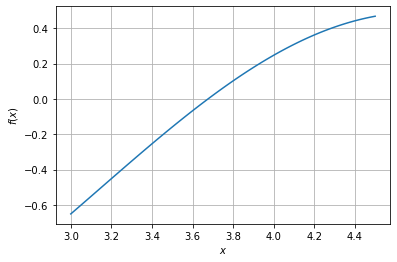

In [24]:
f=lambda w: (-g/(2*(w**2)))*(((np.exp(w*t))-(np.exp(w*t)))/2)-np.sin(w*t)-xt
xn=np.linspace(3,4.5,100)
plt.plot(xn,f(xn))
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()

Con la gráfica vemos que la raíz se encuentra entre 3.6 y 3.8 en algún lado. Usemos los diferentes métodos y veamos si funcionan para hallar las raices

In [25]:
a=biseccion(3.6,3.8,f,100,eps=10e-5)
b=puntofijo(3.6,f,100,eps=10e-5)
c=secante(3.6,3.8,f,100,eps=10**-5)
print("Con el método de bisección, w=",a,"con una precisión de 10e-5")
print("Con el método de punto fijo, w=",b,"con una precisión de 10e-5")
print("Con el método de secante, w=",c,"con una precisión de 10e-5")

Con el método de bisección, w= 3.6767578125 con una precisión de 10e-5
Con el método de punto fijo, w= 3.676752520754488 con una precisión de 10e-5
Con el método de secante, w= 3.67677738970828 con una precisión de 10e-5


Ahora realizemos el respectivo análisis de errores tomando el valor exacto como un w con una tolerancia de 1e-9

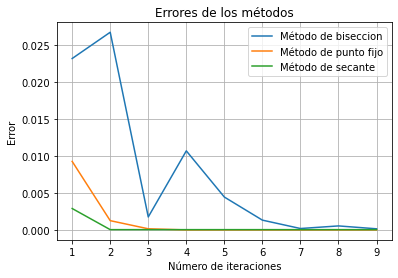

In [26]:
a=biseccion(3.6,3.8,f,100,eps=1e-9)
x=[]
x1=[]
x3=[]
for i in range(1,10):
    x.append(biseccion(3.6,3.8,f,i,eps=10e-5))
for i in range(1,10):
    x3.append(secante(3.6,3.8,f,i,eps=10e-5))
for i in range(1,10):
    x1.append(puntofijo(3.6,f,i,eps=10e-5))
for i in range(len(x)):
    x[i]=abs(x[i]-a)
for i in range(len(x)):
    x3[i]=abs(x3[i]-a)
for i in range(len(x)):
    x1[i]=abs(x1[i]-a)
plt.plot(range(1,10),x,label="Método de biseccion")
plt.plot(range(1,10),x1,label="Método de punto fijo")
plt.plot(range(1,10),x3,label="Método de secante")
plt.title("Errores de los métodos")
plt.xlabel("Número de iteraciones")
plt.ylabel("Error")
plt.grid()
plt.legend()
plt.show()

Podemos ver que cuando el número de iteraciones crece, todas tienen a un valor más aproximado al real, pero claramente los métodos de punto fijo y secante se acercan más rápidamente al valor real

## Punto 2:

El área de un segmento circular está dado por: 
$$ A=\frac{R^{2}}{2} (\theta-sin\theta)$$

Si queremos hallar el ángulo para el cual queremos que el área sea un cuarto de la circunferencia es equivalente a hallar los ceros de: $$\frac{R^{2}}{2} (\theta-sin\theta)-\frac{\pi R^{2}}{4}=0$$


In [47]:
g=lambda x: ((x-np.sin(x))/2)-np.pi/4
x=biseccion(0,2*np.pi,g,100,eps=10e-5)
print(x,"es el ángulo en radianes")

2.3097915713588044 es el ángulo en radianes


Ahora para ver como mejora la precisión con el número de iteraciones vamos a utilizar la solución de el método de bisección pero con una precisión de 10e-16

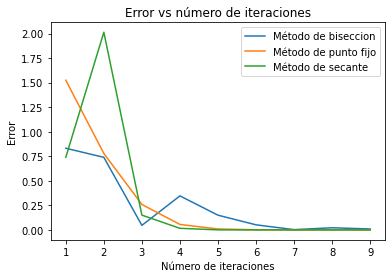

In [49]:
x=biseccion(0,2*np.pi,g,100,eps=10e-16)
a=[]
for i in range(1,10):
    a.append(abs(biseccion(0,2*np.pi,g,i,eps=10e-5)-x))
b=[]
for i in range(1,10):
    b.append(abs(puntofijo(0,g,i,eps=10e-5)-x))
c=[]
for i in range(1,10):
    c.append(abs(secante(0,2*np.pi,g,i,eps=10e-5)-x))
    
plt.plot(range(1,10),a,label="Método de biseccion")
plt.plot(range(1,10),b,label="Método de punto fijo")
plt.plot(range(1,10),c,label="Método de secante")
plt.title("Error vs número de iteraciones")
plt.ylabel("Error")
plt.xlabel("Número de iteraciones")
plt.legend()
plt.show()

## Punto 3:
definamos primero nuestras variables A,B,C,D,E:

In [90]:
l=89
h=49
D=55
b=11.5*(np.pi/180)
A=l*np.sin(b)
B=l*np.cos(b)
C=(h+0.5*D)*np.sin(b)-0.5*D*np.tan(b)
E=(h+0.5*D)*np.cos(b)-0.5*D
O=lambda x: A*np.sin(x)*np.cos(x)+B*(np.sin(x)**2)-C*np.cos(x)-E*np.sin(x)
x=33

Ahora veamos si realmente cada método se acerca a 33 en sus iteraciones viendo la diferencia entre 33 y el resultado entre cada método:

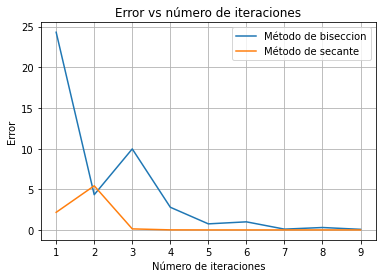

In [92]:
a=[]
for i in range(1,10):
    a.append(abs(biseccion(0,2,O,i,eps=10e-5)*(180/np.pi)-x))
b=[]
for i in range(1,10):
    b.append(abs((puntofijo(0,O,i,eps=10e-5)*(180/np.pi))-x))
c=[]
for i in range(1,10):
    c.append(abs(secante(0,2,O,i,eps=10e-5)*(180/np.pi)-x))
    
plt.plot(range(1,10),a,label="Método de biseccion")
plt.plot(range(1,10),c,label="Método de secante")
plt.title("Error vs número de iteraciones")
plt.ylabel("Error")
plt.xlabel("Número de iteraciones")
plt.legend()
plt.grid()
plt.show()

Podemos ver que los métodos de biseccion y secante se acercan a 33 rápidamente, sin embargo, el método de punto fijo diverge como veremos a continuación:

<function matplotlib.pyplot.show(close=None, block=None)>

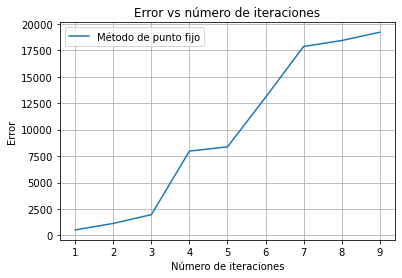

In [88]:
b=[]
for i in range(1,10):
    b.append(abs((puntofijo(0,O,i,eps=10e-5)*(180/np.pi))-x))
plt.plot(range(1,10),b,label="Método de punto fijo")
plt.title("Error vs número de iteraciones")
plt.ylabel("Error")
plt.xlabel("Número de iteraciones")
plt.legend()
plt.grid()
plt.show




4. Construir un fractal empleando el metodo de Newton-Raphson, 
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)} 
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image


In [ ]:
Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin


In [ ]:
#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h
  


In [ ]:
a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


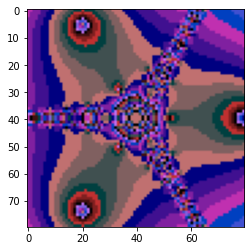

In [ ]:
plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
